> A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. SVMs are partic ularly well suited for classification of complex but small- or medium-sized datasets

# Linear SVM Classification

Figure below shows part of the iris dataset that was introduced at the end of Chapter 4. The two classes can clearly be separated easily with a straight line (they are linearly separable)

The left plot shows the decision boundaries of three possible linear classifiers. The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classi fier; this line not only separates the two classes but also stays as far away from the closest training instances as possible. You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called large margin classification

<p align='center'>
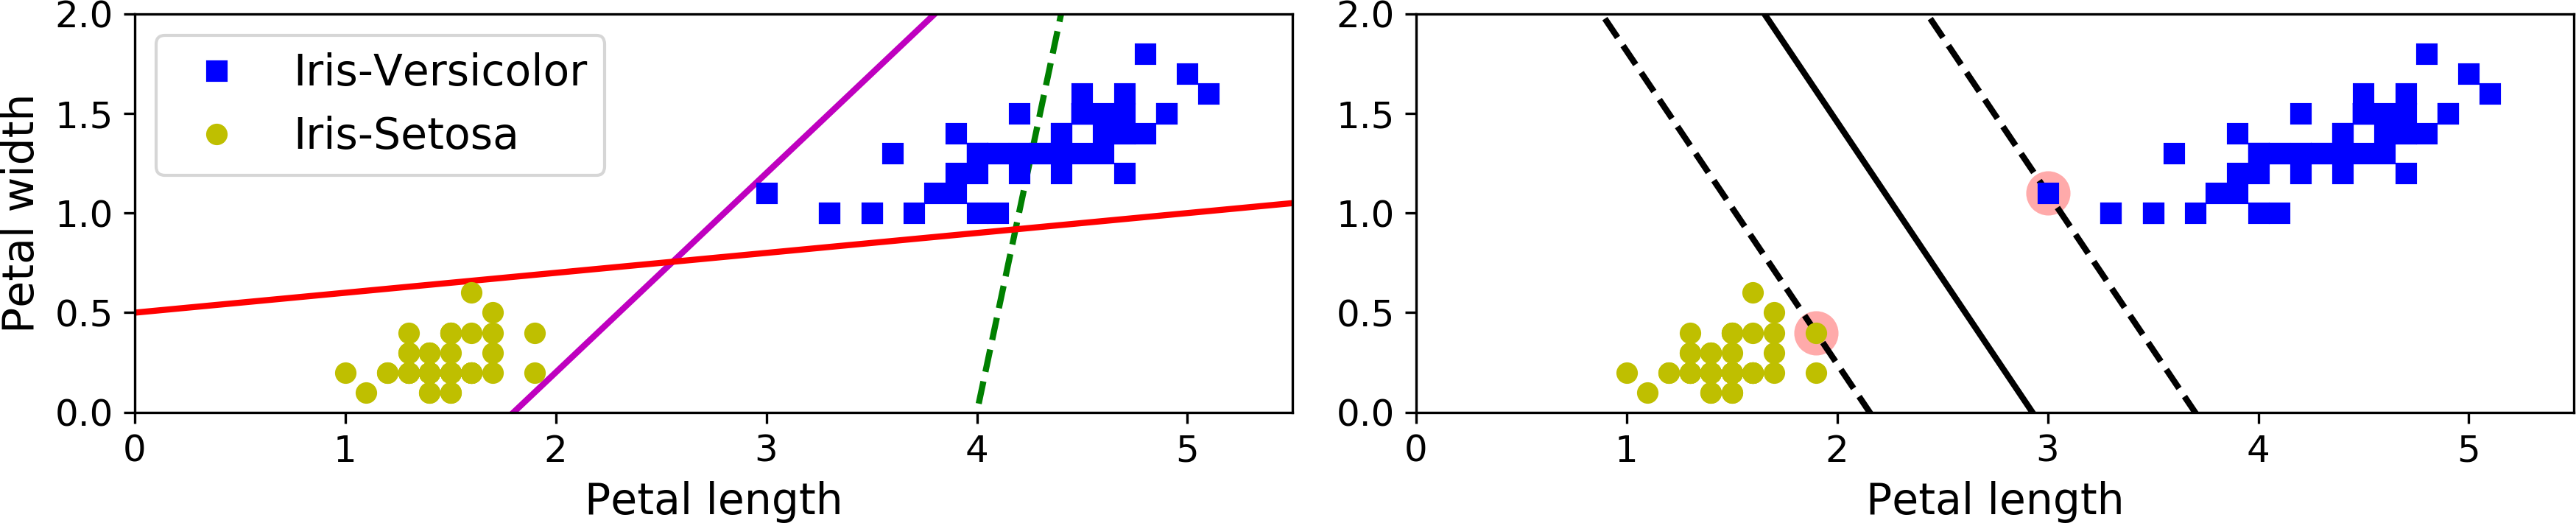
</p>

adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the support vectors (they are circled in Figure above)

SVMs are sensitive to the feature scales, as you can see in Figure below

on the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary looks much better (on the right plot)

<p align='center'>
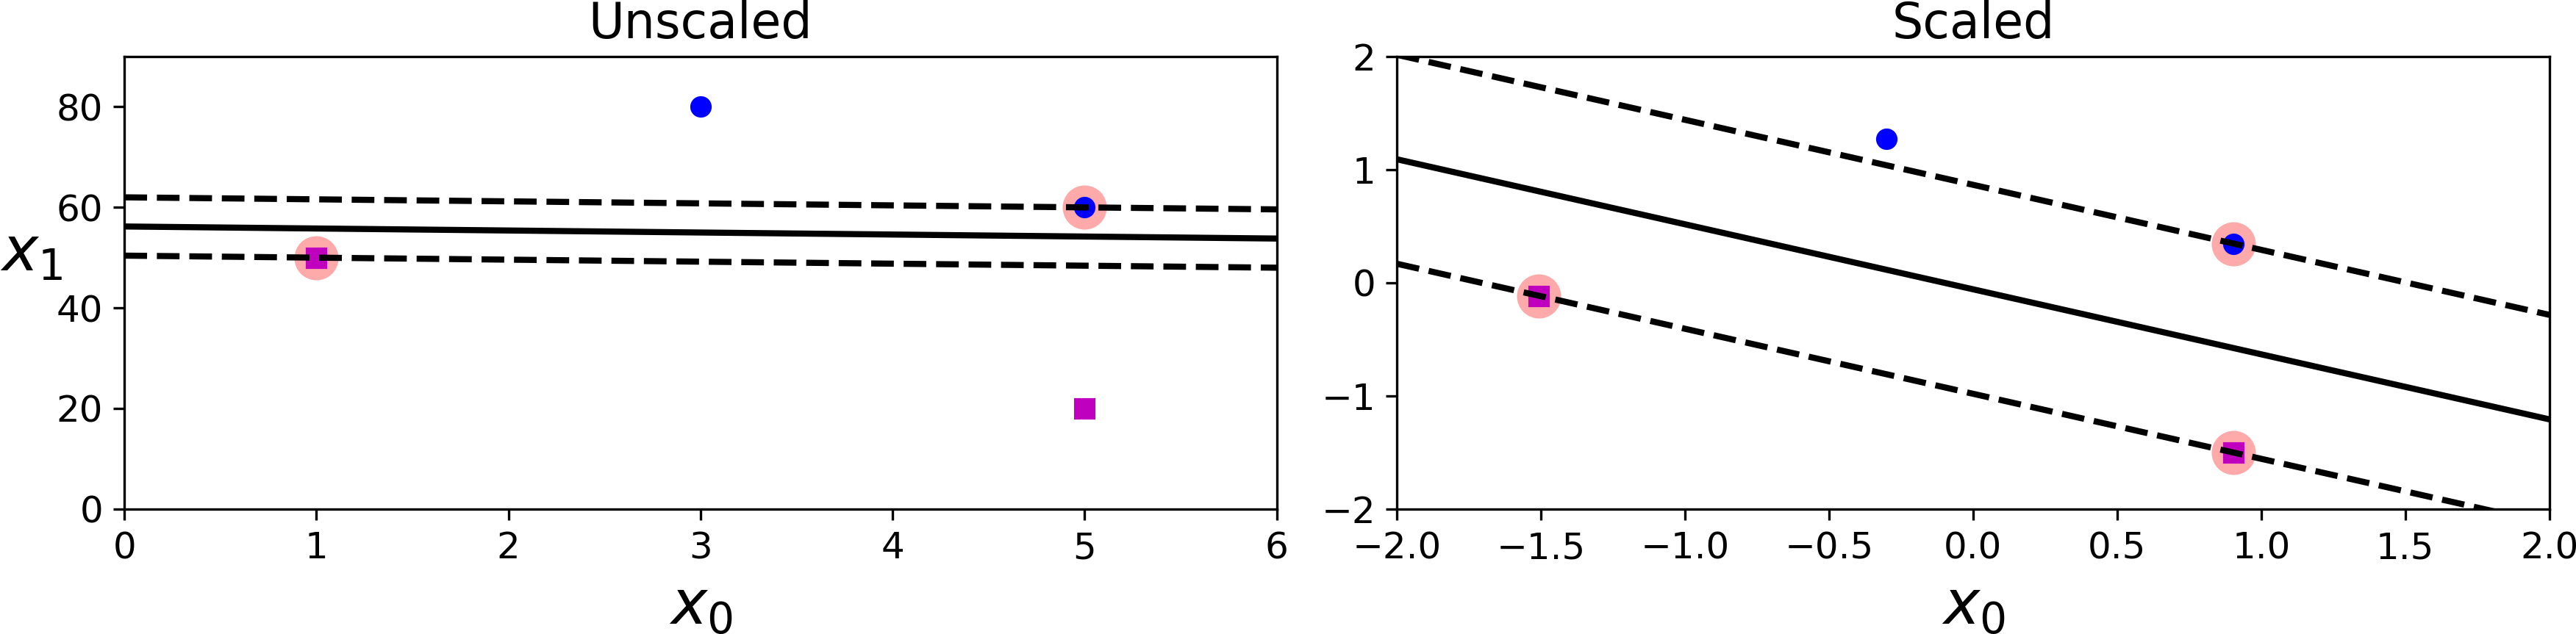
</p>

## Soft Margin Classification

If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification

There are two main issues with hard margin classifi cation. First, it only works if the data is linearly separable, and second it is quite sensitive to outliers

Figure below shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin. without the outlier, and it will probably not generalize as well


<p align='center'>
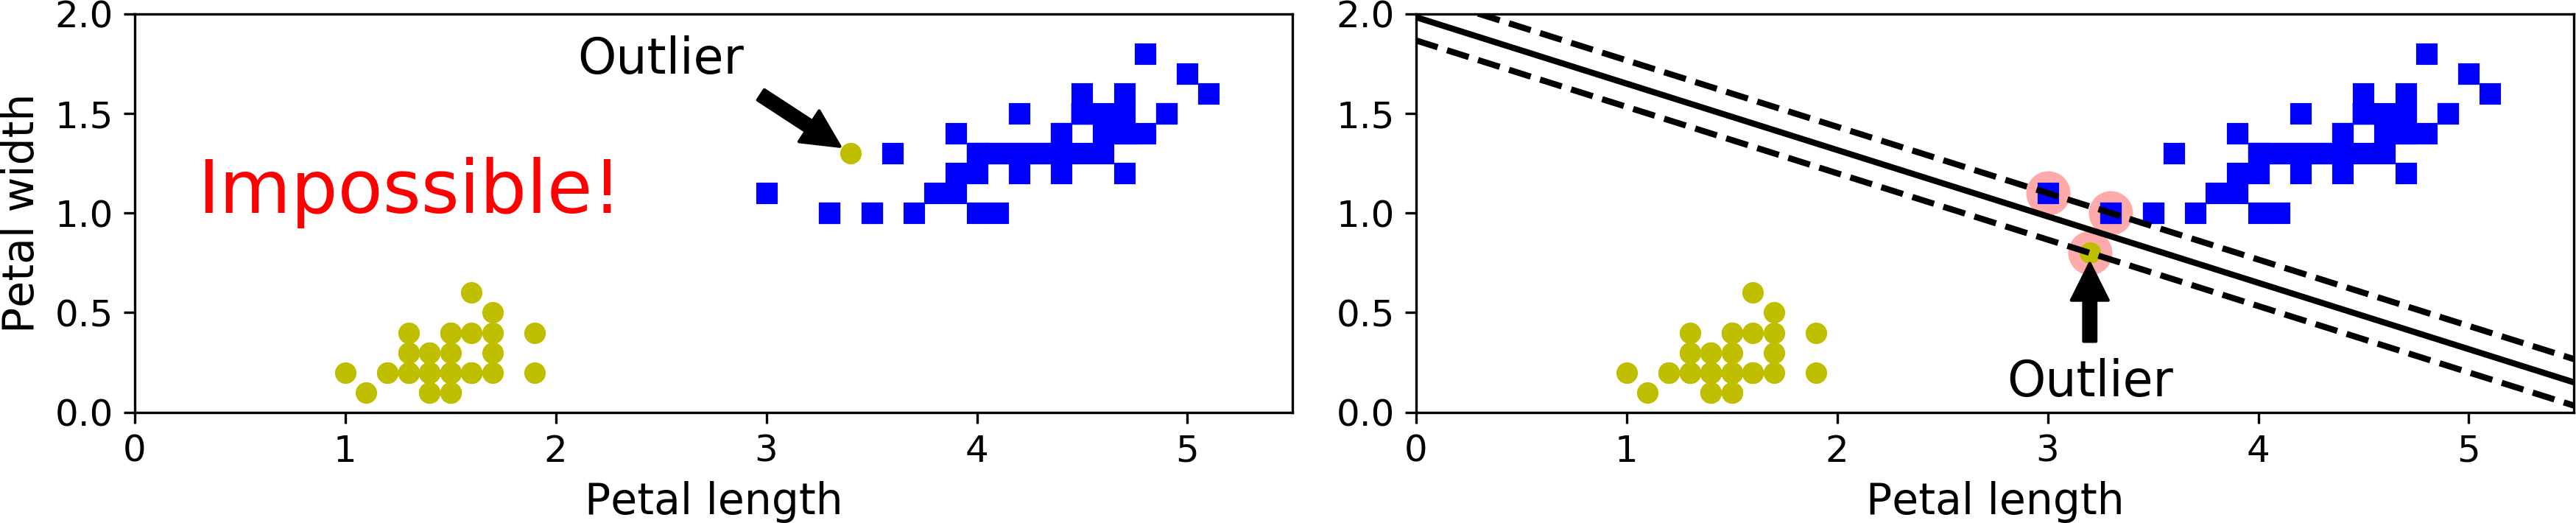
</p>

To avoid these issues it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification

In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations 

Figure below shows the decision boundaries and margins of two soft margin SVM classifiers on a nonlinearly separable dataset

On the left, using a low C value the margin is quite large, but many instances end up on the street. On the right, using a high C value the classifier makes fewer margin violations but ends up with a smaller margin

However, it seems likely that the first classifier will generalize better: in fact even on this train ing set it makes fewer prediction errors, since most of the margin violations are actually on the correct side of the decision boundary

<p align='center'>
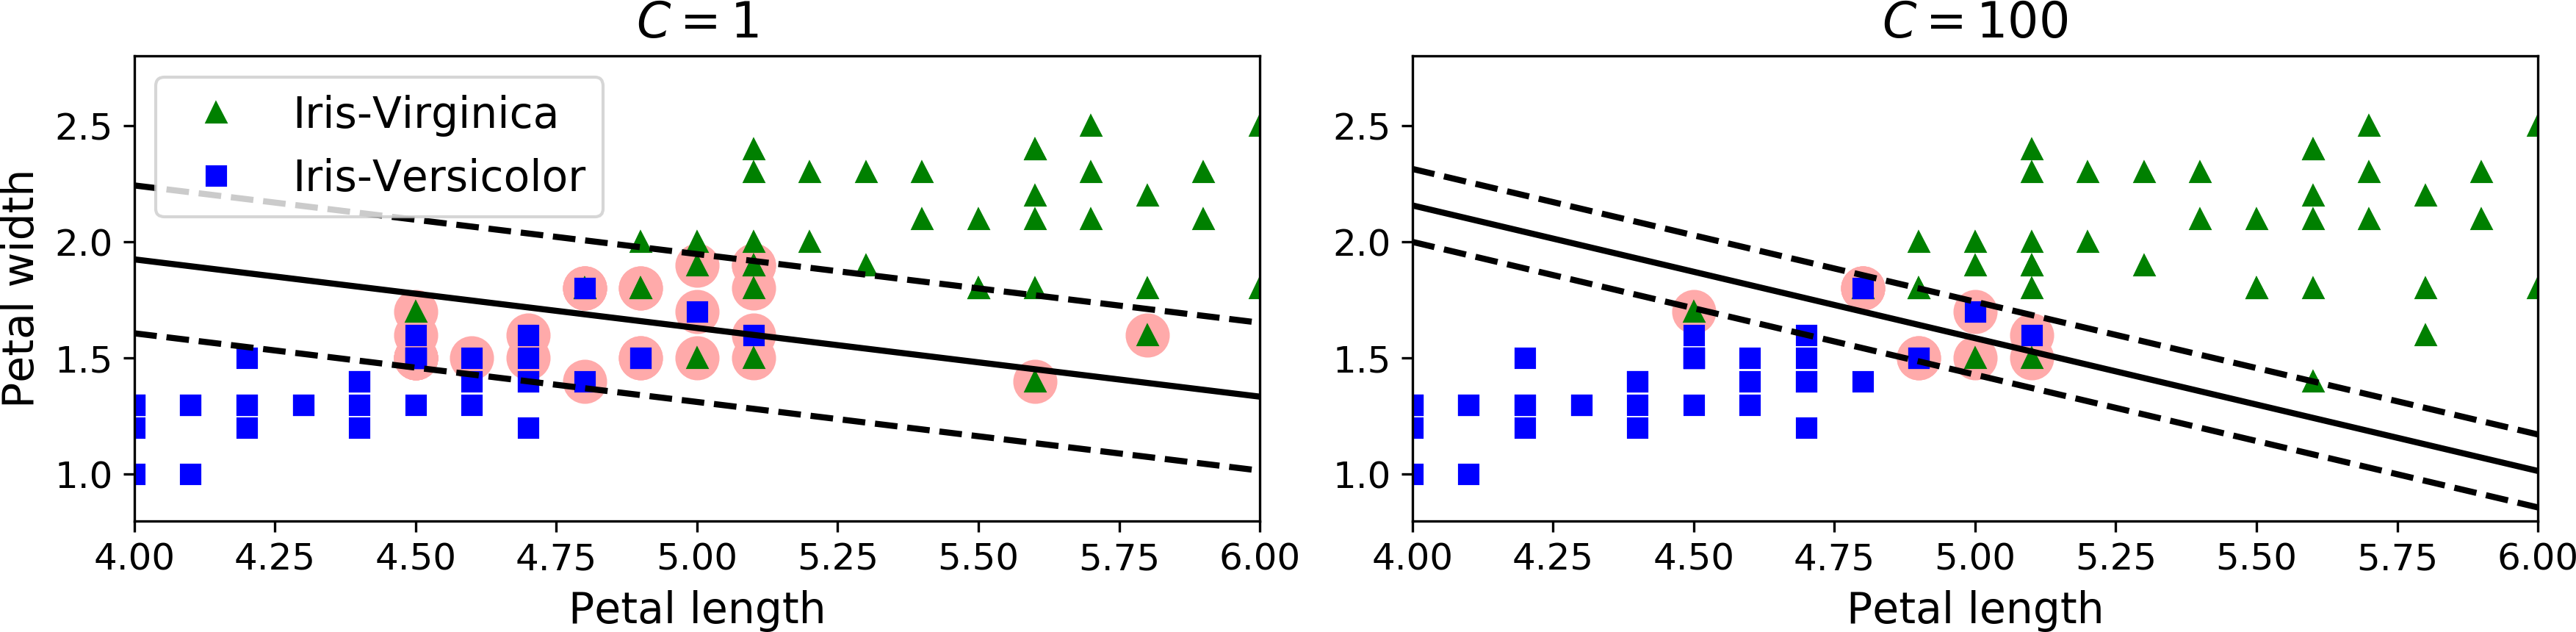
</p>

If your SVM model is overfitting, you can try regularizing it by reducing C



The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss function) to detect Iris-Virginica flowers

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

Then, as usual, you can use the model to make predictions

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Unlike Logistic Regression classifiers, SVM classifiers do not out put probabilities for each class

Alternatively, you could use the class, using SVC(kernel="linear", C=1), but it is much slower, especially with large training sets, so it is not recommended

Another option is to use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core train ing), or to handle online classification tasks

# Nonlinear SVM Classification

Many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features, in some cases this can result in a linearly separable dataset

Consider the left plot: it represents a simple dataset with just one feature x1. This dataset is not linearly separable, as you can see. But if you add a second feature $x_2 = (x_1)^2$, the resulting 2D dataset is perfectly linearly separable



<p align='center'>
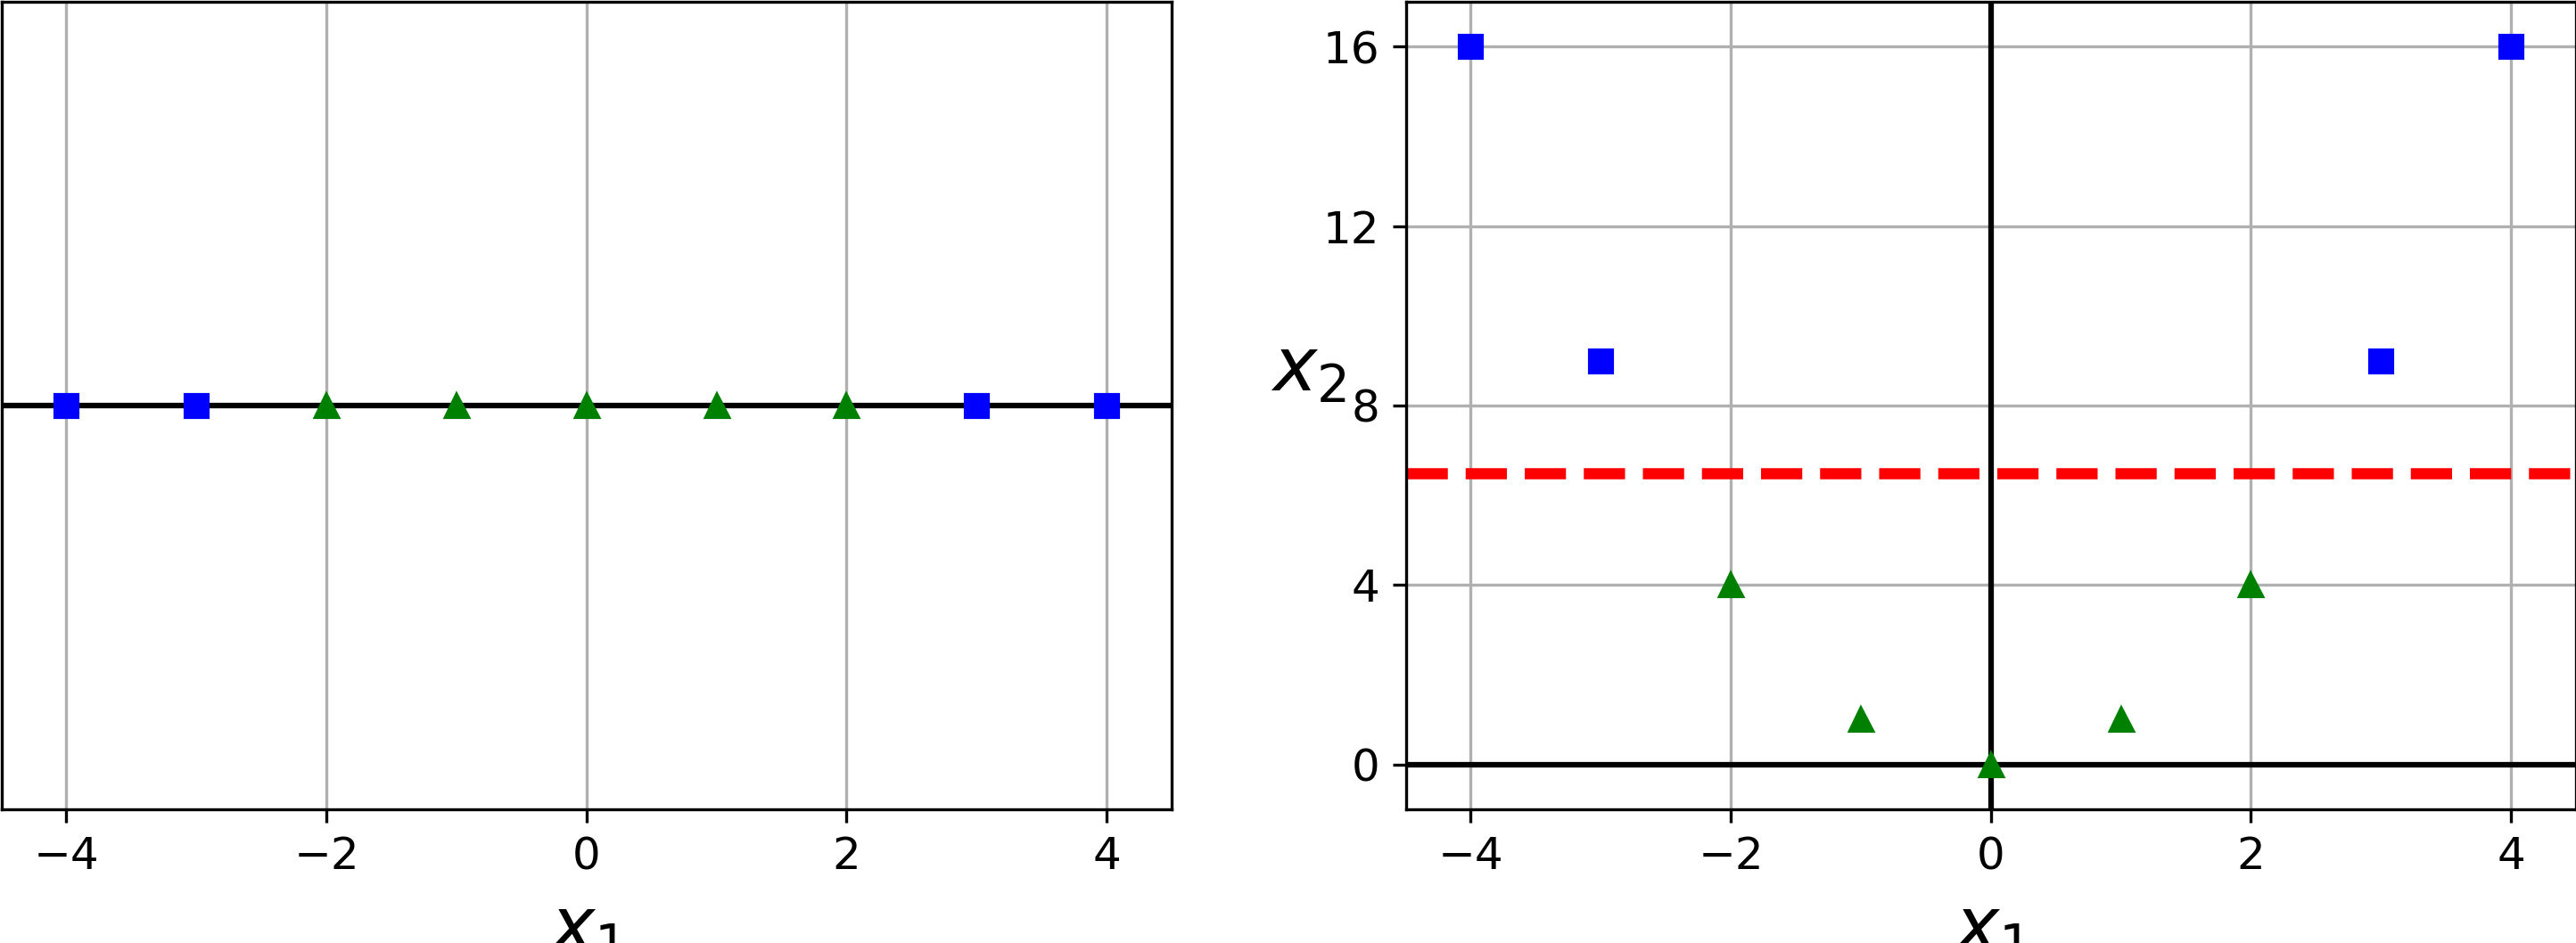
</p>

To implement this idea using Scikit-Learn, you can create a Pipeline containing a PolynomialFeatures transformer, followed by a StandardScaler and a LinearSVC

Let’s test this on the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles. You can generate this dataset using the make_moons()  function 

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ('poly_features', PolynomialFeatures(degree=3)),
        ('scaler', StandardScaler()),
        ('svm_clf', LinearSVC(C=10, loss='hinge'))                       
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

<p align='center'>
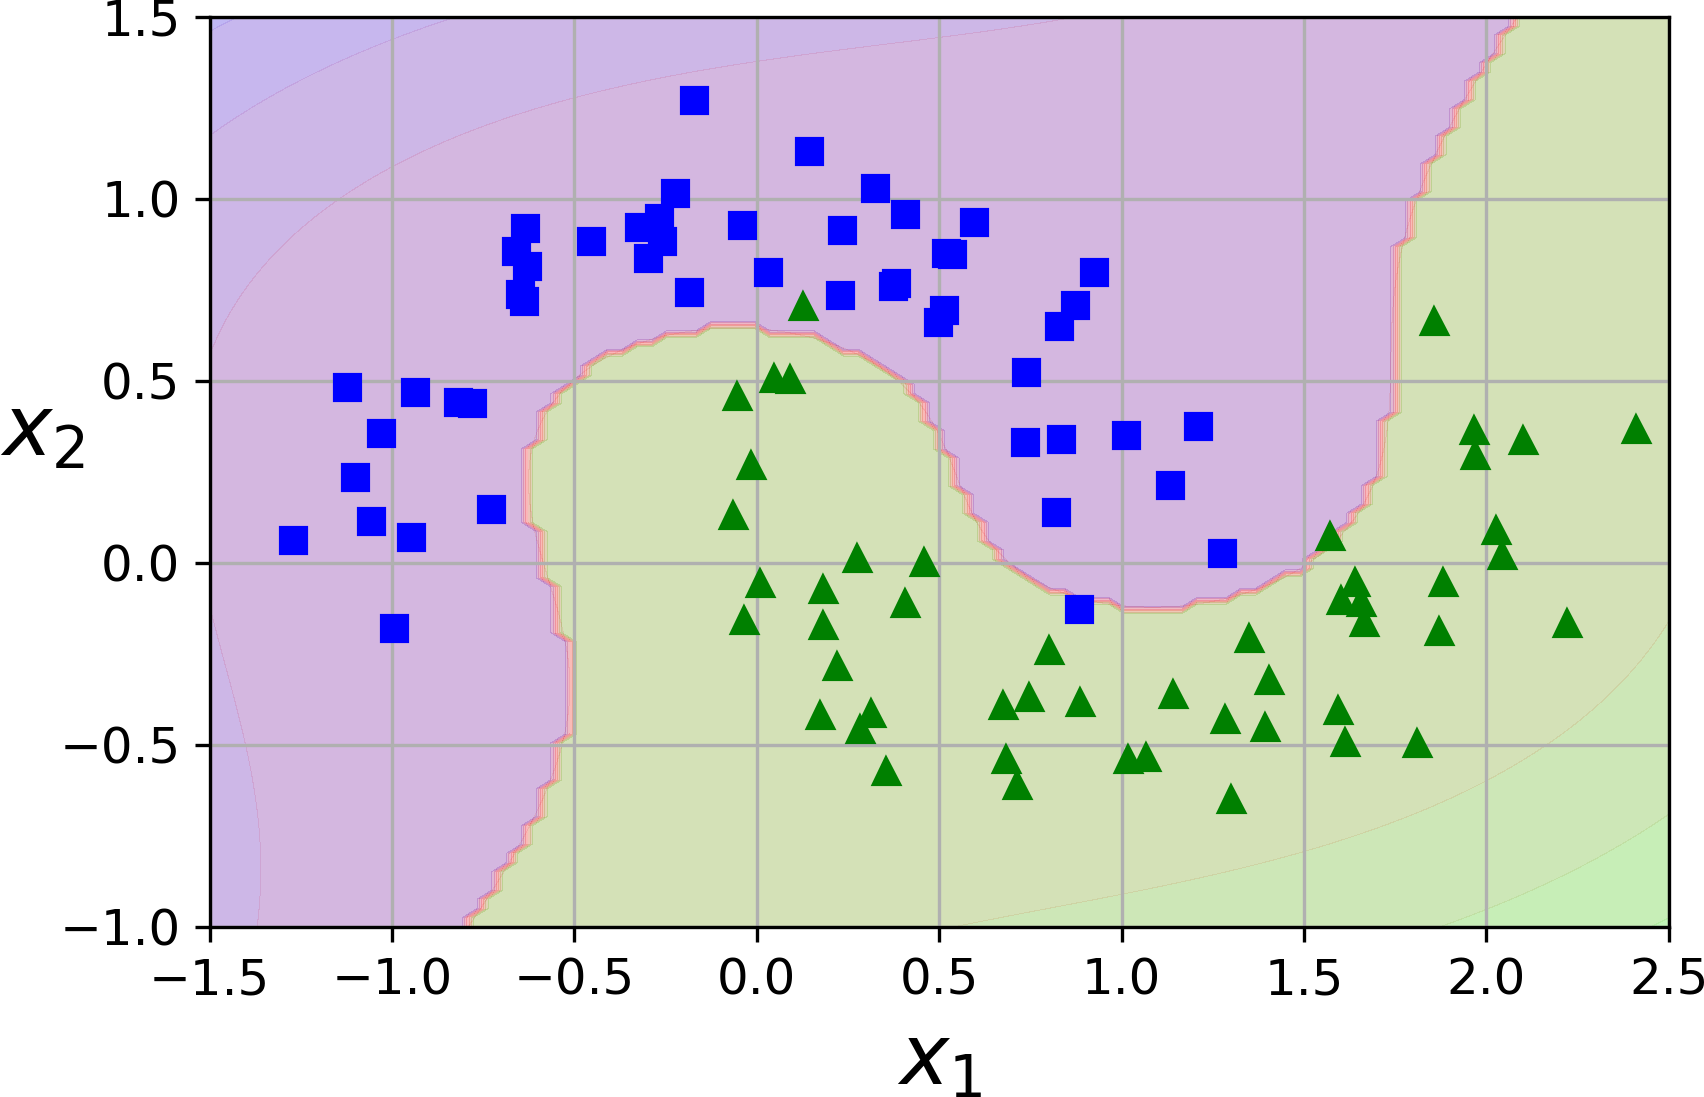
</p>

## Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the kernel trick. It makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomials, without actually having to add them. So there is no combinato rial explosion of the number of features since you don’t actually add any features. This trick is implemented by the SVC class. Let’s test it on the moons dataset 

In [4]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))                        
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

This code trains an SVM classifier using a $3^{rd}$ degree polynomial kernel. It is represented on the left of Figure below

On the right is another SVM classifier using a $10^{th}$ degree polynomial kernel

Obviously, if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it

The hyperparameter coef0 controls how much the model is influenced by high degree polynomials versus low-degree polynomials



<p align='center'>
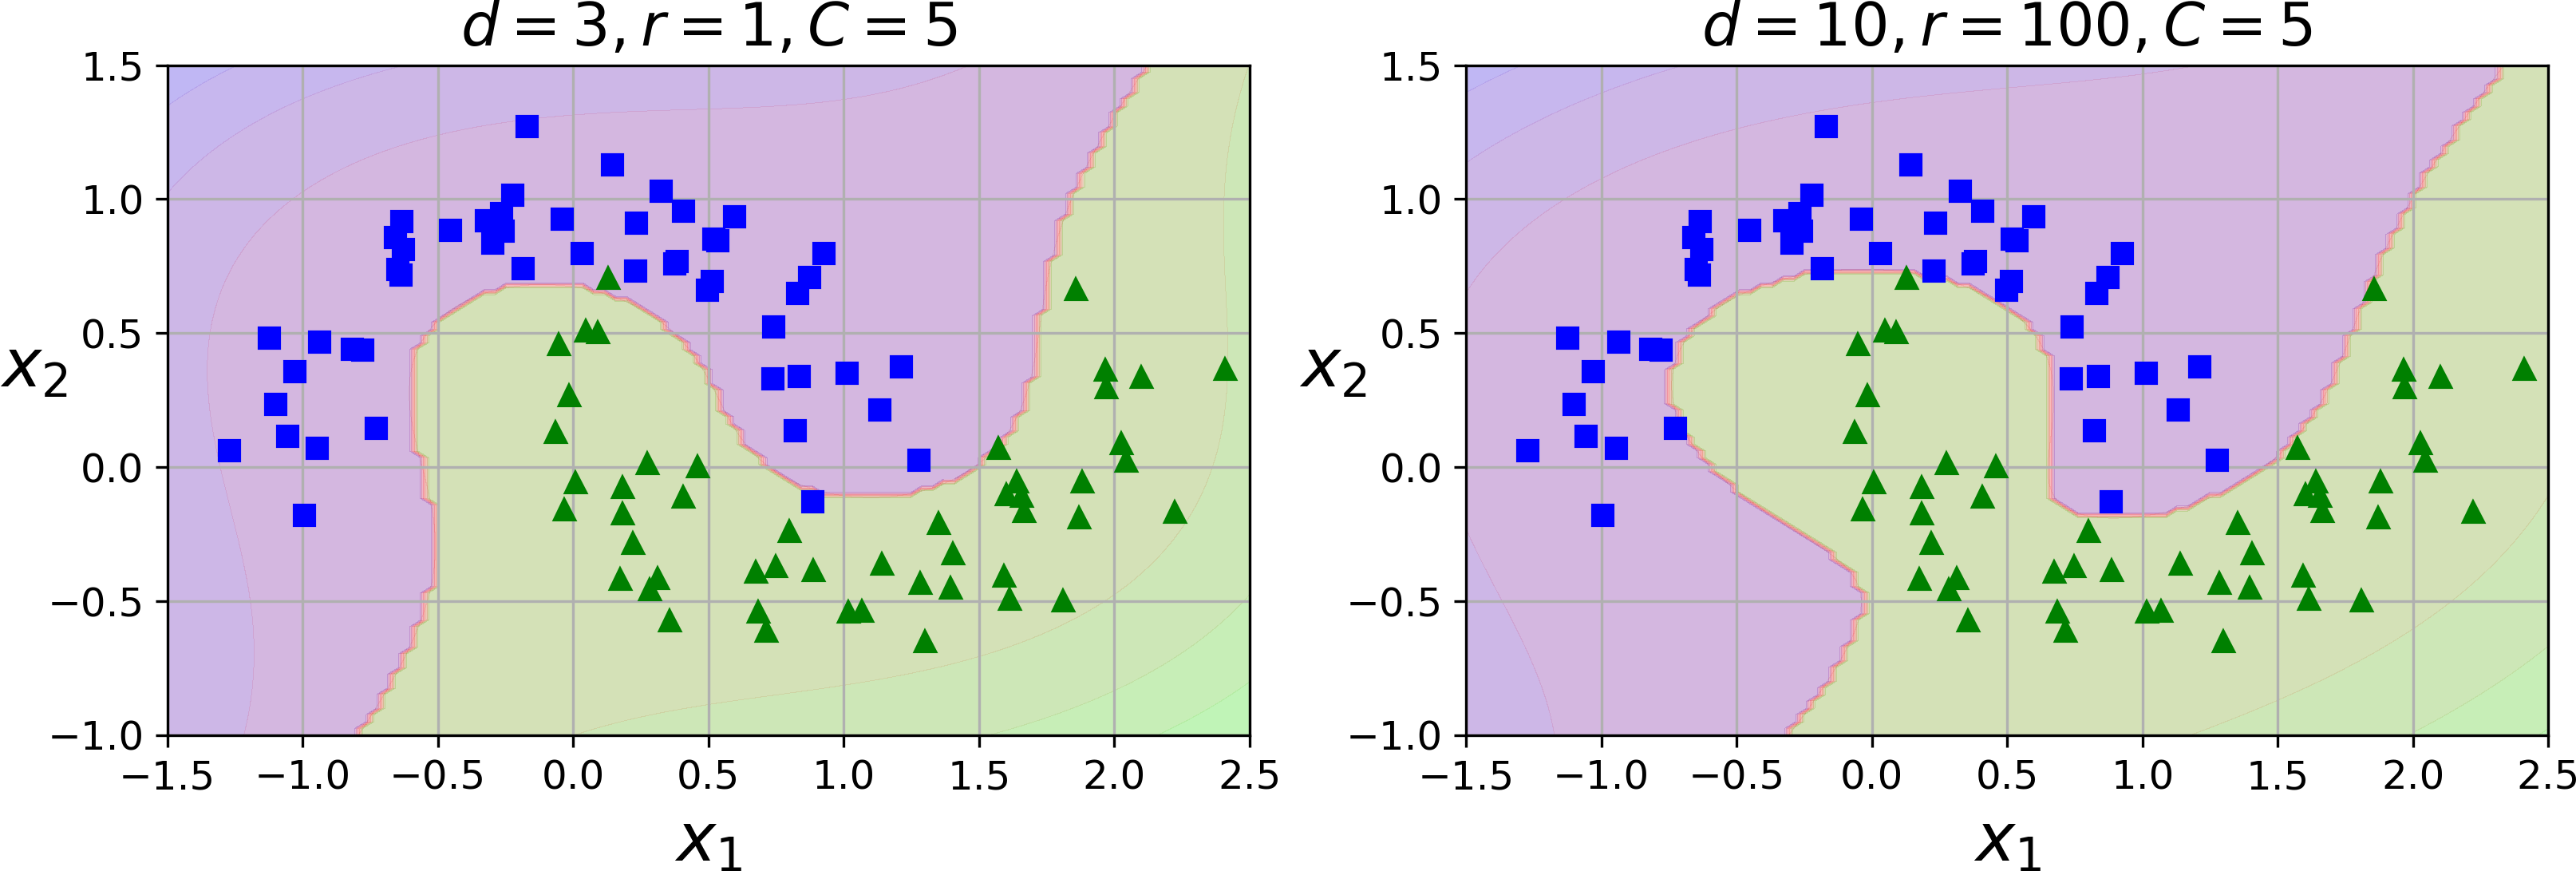
</p>

## Adding Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark

For example, let’s take the one-dimensional dataset discussed earlier and add two landmarks to it at $x_1 = -2$ and $x_1 = 1$

Next, let’s define the similarity function to be the Gaussian Radial Basis Function (RBF) with $\gamma = 0.3$

Gaussian RBF

$$\phi_\gamma (x,l) = exp(- \gamma || x - l ||^2) $$

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). Now we are ready to compute the new features

For example, let’s look at the instance $x_1 = -1$: it is located at a distance of 1 from the first landmark, and 2 from the second landmark

Therefore its new features are $x_2 = exp (-0.3 \times 1^2) 	\approx 0.74$ and $x_3 = exp(-0.3 \times 2^2) \approx 0.30$

The plot on the right below shows the transformed dataset (dropping the original features). As you can see, it is now linearly separable

<p align='center'>
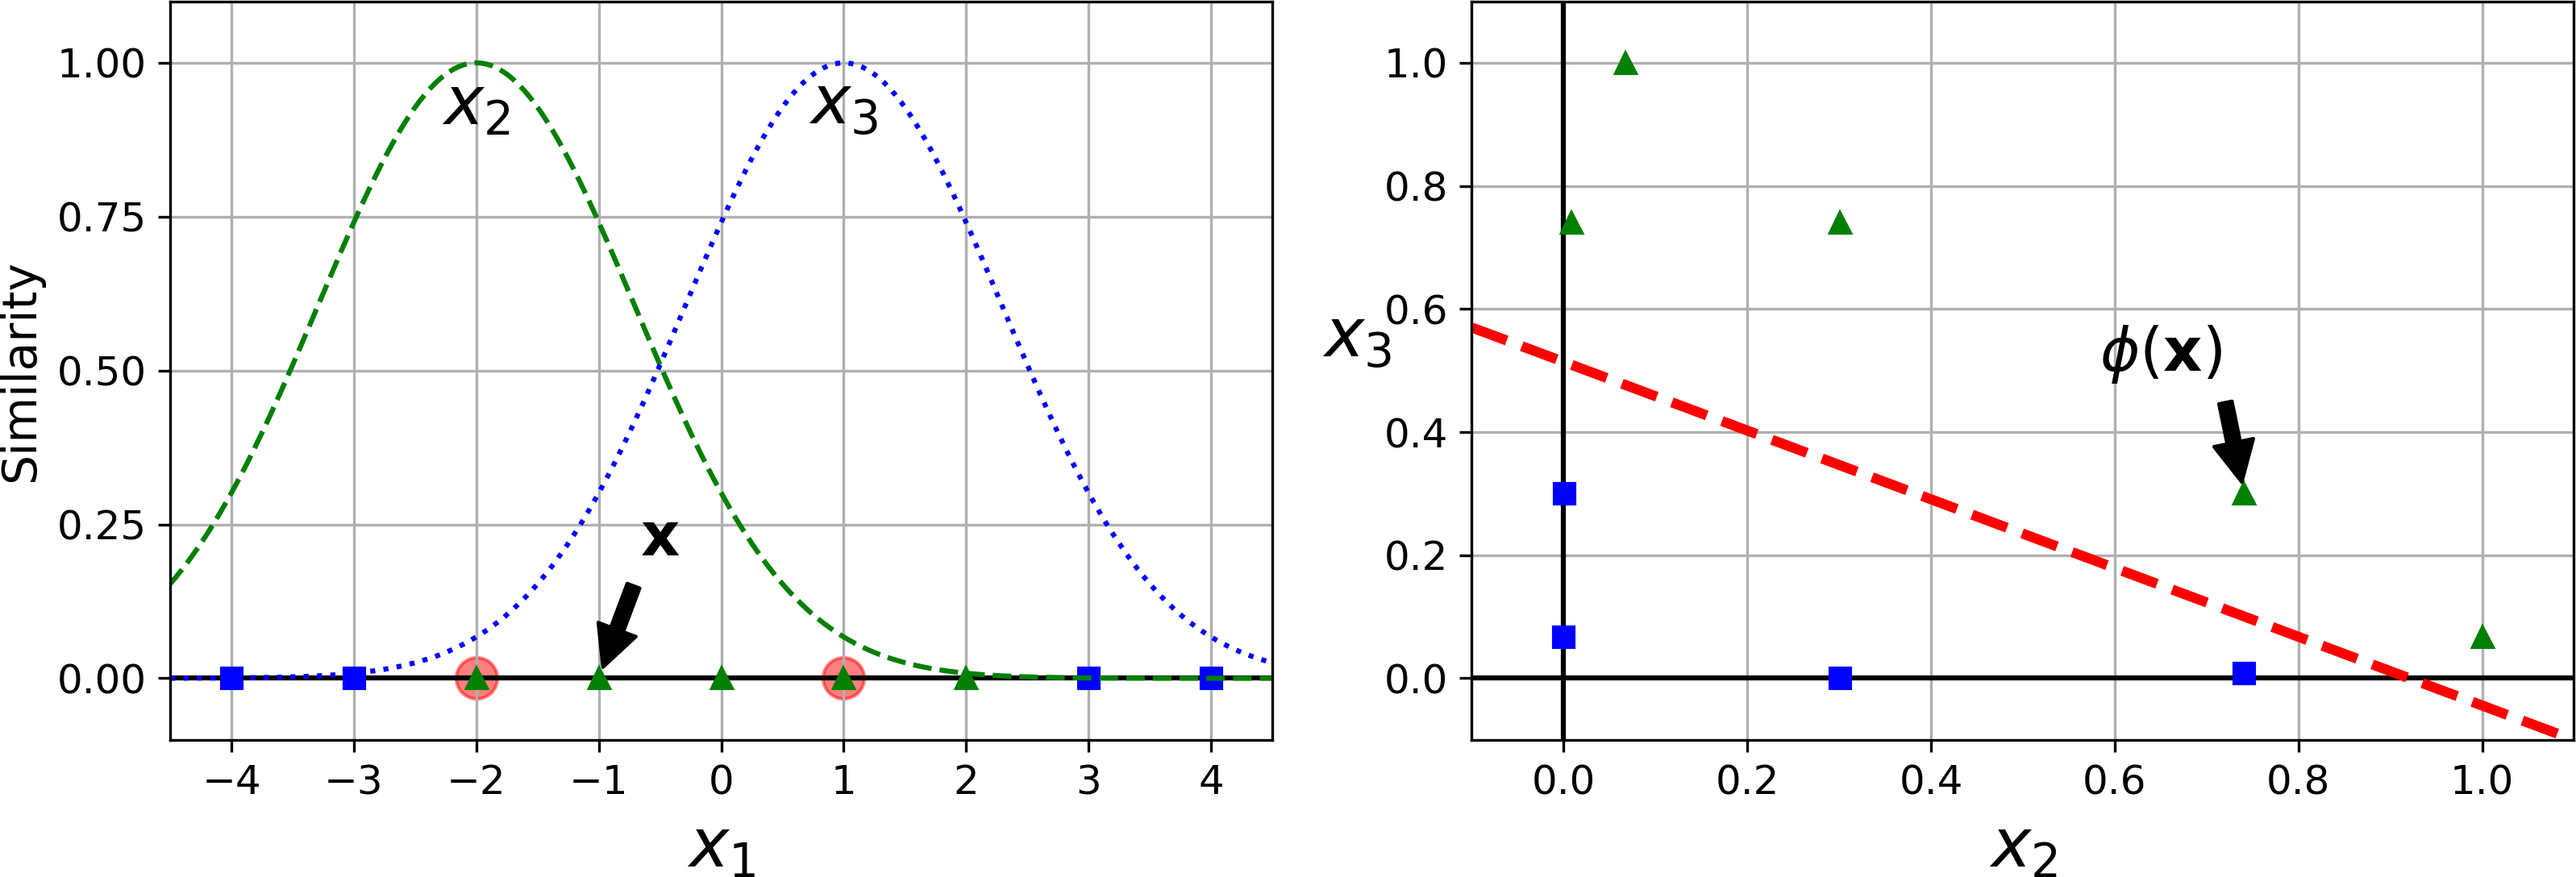
</p>

You may wonder how to select the landmarks. The simplest approach is to create a landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable

The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features

## Gaussian RBF Kernel

Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets

However, once again the kernel trick does its SVM magic: it makes it possible to obtain a similar result as if you had added many similarity features, without actually having to add them

Let’s try the Gaussian RBF kernel using the SVC class 

In [5]:
rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))                       
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

This model is represented on the bottom left of Figure below

The other plots show models trained with different values of hyperparameters gamma ($\gamma$) and C. Increasing gamma makes the bell-shape curve narrower and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances

Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother

So $\gamma$ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter) 




<p align='center'>
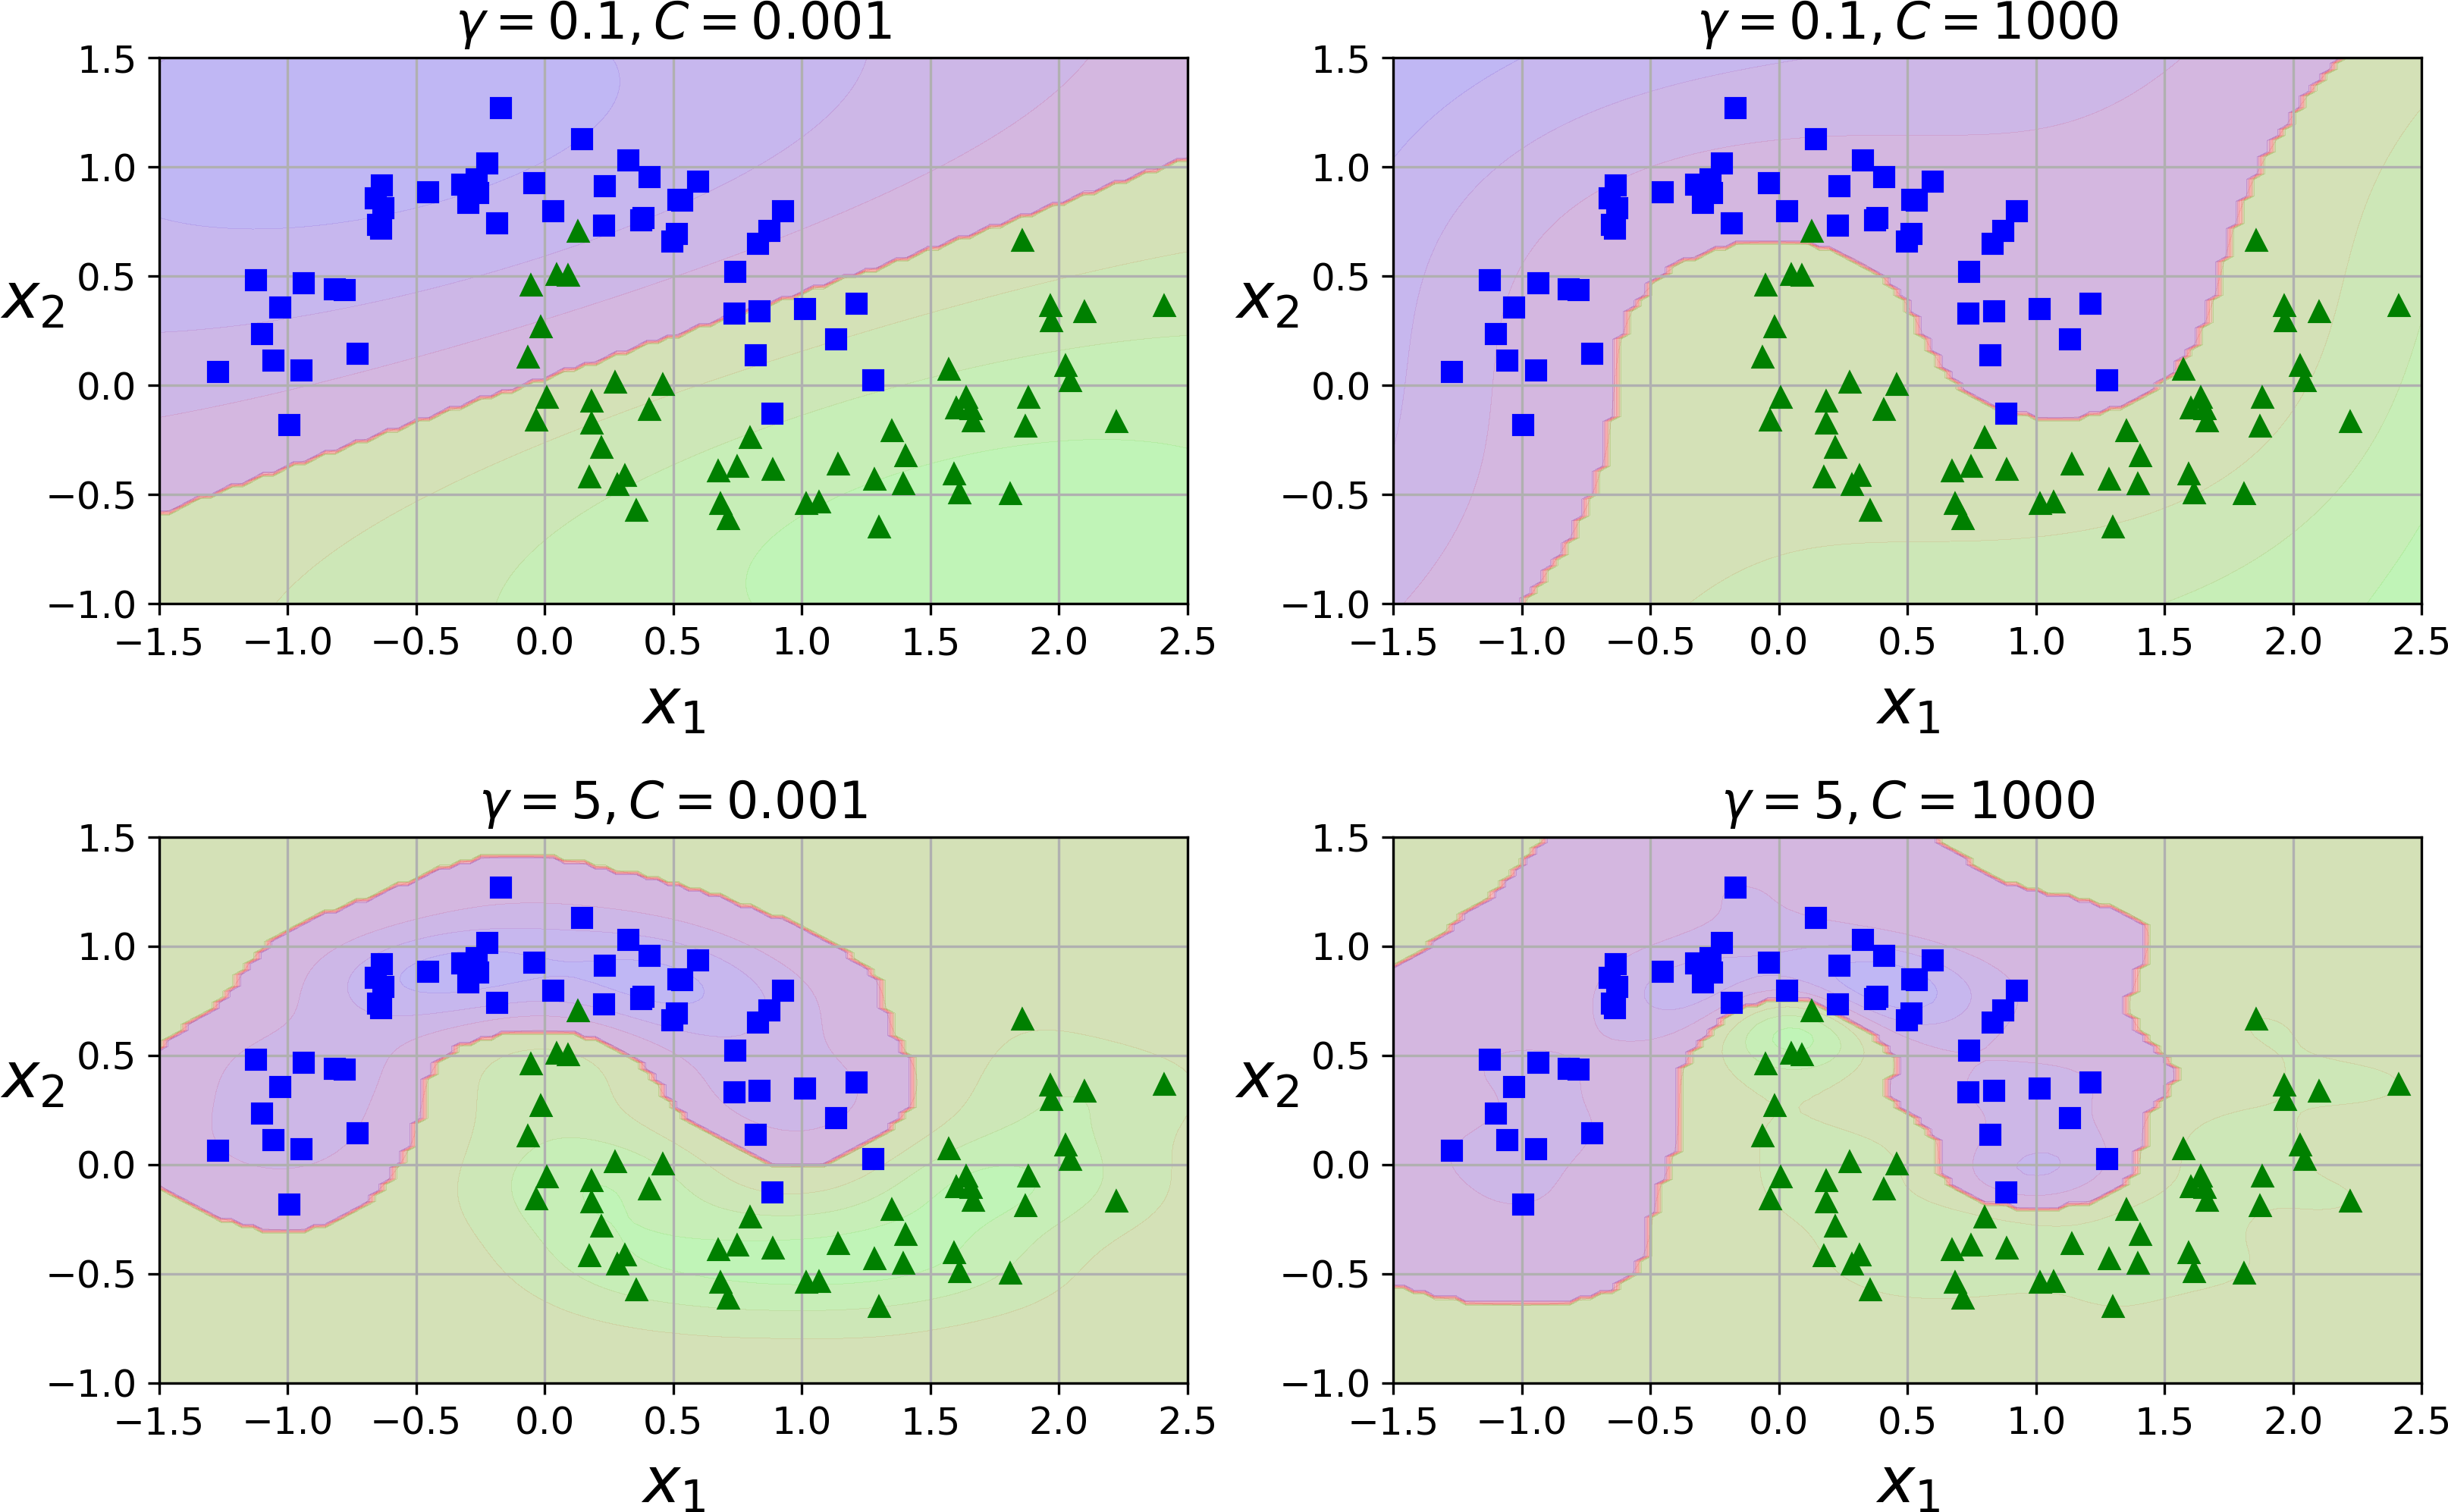
</p>

Other kernels exist but are used much more rarely. For example, some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance)

## Computational Complexity

The LinearSVC class is based on the liblinear, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n)

The algorithm takes longer if you require a very high precision. This is controlled by the tolerance hyperparameter $\epsilon$ (called tol in Scikit-Learn). In most classification tasks, the default tolerance is fine

